In [84]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_excel("/Users/jnesnky/BANA_3363/Excel and inclass Demonstrations/Regression/moviedataRAW.xlsx")

In [85]:
df.head()

,title,lead,tickets,runtime,sequel,type,genre,domestic_rev,intl_rev,totalrev,...,rating,budget,sex,RT_Rating,CPI,real_budget,real_rev,lnRealBudget,lnRealRev,return
0,Exorcist The,von Sydow Max,115.744634,121,no,Fantasy,Horror,204.9,197.9,402.8,...,R,12.0,Male,86,44.425,64.016657,2148.825796,4.159143,7.672677,33.566667
1,Good Will Hunting,Williams Robin,29.531565,126,no,Contemporary Fiction,Drama,138.3,87.5,225.8,...,R,10.0,Male,97,160.525,14.763744,333.365339,2.692174,5.809239,22.580000
2,Fatal Attraction,Douglas Michael,37.730126,120,no,Contemporary Fiction,Thriller,148.5,163.5,312.0,...,R,14.0,Female,78,113.617,29.202760,650.804369,3.374263,6.478209,22.285714
3,Back to the Future,Fox Michael J,57.700364,116,no,Science Fiction,Adventure,212.3,173.3,385.6,...,PG,19.0,Male,96,107.600,41.848559,849.305502,3.734057,6.744419,20.294737
4,Courageous,Kendrick Alex,4.353138,129,no,Contemporary Fiction,Drama,34.5,0.7,35.2,...,PG-13,2.0,Male,30,224.923,2.107343,37.089244,0.745428,3.613327,17.600000


In [86]:
df = df[df["genre"] != "Horror"]

In [88]:
def violinplot(x, y, df):
    
    ax = sns.violinplot(x=x, y=y,
                    data=df, palette="muted", inner="quartile", cut=0)

    ax.axhline(np.mean(df[y]), ls='--')
    
    return ax

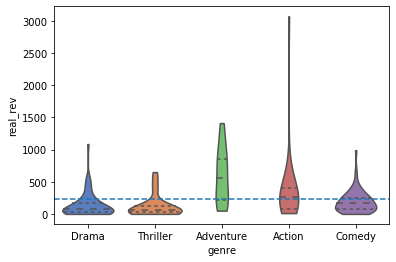

In [89]:
violinplot(x= "genre", y="real_rev", df = df)

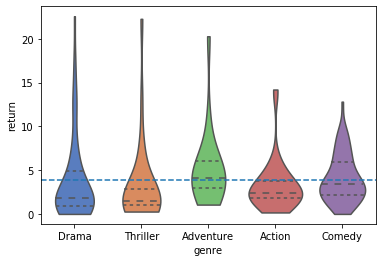

In [90]:
violinplot(x= "genre", y="return", df = df)

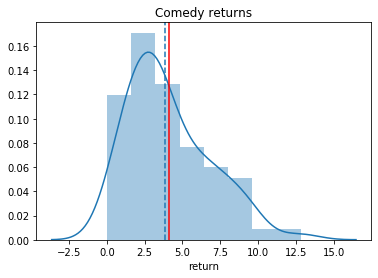

In [92]:

ax = sns.distplot(df[df["genre"]=="Comedy"]["return"])

ax.set_title("Comedy returns")
ax.axvline(np.mean(df["return"]), ls='--')
ax.axvline(np.mean(df[df["genre"]=="Comedy"]["return"]), ls='-', color='r')

In [82]:

def ci(df, cat, choice, col):
    global_mean = np.mean(df[col])
    choice_mean = np.mean(df[df[cat]==choice][col])
    choice_stdev = np.std(df[df[cat]==choice][col])
    choice_len = len(df[df[cat]==choice])
    lower = choice_mean - 1.96*(choice_stdev / np.sqrt(choice_len))
    upper = choice_mean + 1.96*(choice_stdev / np.sqrt(choice_len))
    
    c = [True if lower < np.mean(df[col]) < upper else False]

    
    return lower, upper, global_mean, c

In [83]:
ci(df = df, cat = "genre", choice = "Comedy", col="return")

(3.4692314354045415, 4.7053010624553835, 3.8258608489936807, [True])

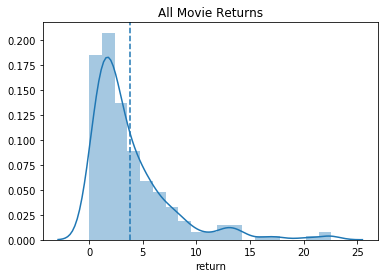

In [56]:

ax = sns.distplot(df["return"])

ax.set_title("All Movie Returns")
ax.axvline(np.mean(df["return"]), ls='--')


In [57]:
x

NameError: name 'x' is not defined